<a href="https://colab.research.google.com/github/gomunamu/pdp/blob/main/mnist_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)





11490434/11490434 [==============================] - 0s 0us/step


In [7]:
from tensorflow import keras
from keras import layers
def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"]
  )
  return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

model = get_model()
history_zeros = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 11s 26ms/step - loss: 0.6244 - accuracy: 0.8100 - val_loss: 0.3348 - val_accuracy: 0.8951
Epoch 2/10
375/375 [==============================] - 16s 42ms/step - loss: 0.2622 - accuracy: 0.9183 - val_loss: 0.1932 - val_accuracy: 0.9400
Epoch 3/10
375/375 [==============================] - 17s 45ms/step - loss: 0.1725 - accuracy: 0.9463 - val_loss: 0.1580 - val_accuracy: 0.9532
Epoch 4/10
375/375 [==============================] - 11s 28ms/step - loss: 0.1227 - accuracy: 0.9617 - val_loss: 0.1622 - val_accuracy: 0.9521
Epoch 5/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0921 - accuracy: 0.9708 - val_loss: 0.1242 - val_accuracy: 0.9643
Epoch 6/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0668 - accuracy: 0.9789 - val_loss: 0.1484 - val_accuracy: 0.9577
Epoch 7/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0498 - accuracy: 0.9842 - val_loss: 0.1382 - val_accuracy:

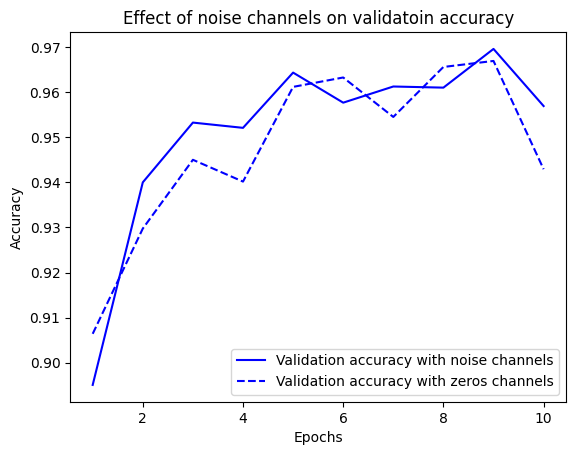

In [8]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validatoin accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
